In [1]:
%load_ext music21.ipython21
from music21 import *

# User's Guide, Chapter 90: Lilypond Unofficial MusicXML Test Suite

In [2]:
print(musicxml.lilypondTestSuite.__doc__)


The Lilypond MusicXML Test Suite comes from 
http://lilypond.org/doc/v2.18/input/regression/musicxml/collated-files

The test suite is licensed under the MIT license 
(https://opensource.org/licenses/mit-license.php)
and copyrighted by the Lilypond project.

Currently this tests only if everything parses without error.  
It does not check to make sure that it actually works.

One change has been made, to 33g-Slur-ChordedNotes.xml
which is contains a common incorrect notation but also a very difficult one 
that music21 can parse if the slur number is changed 
to "2" for the second incorrect slur
since music21 parses all notes of a chord before moving to the next.



In [3]:
import os
import re

allF = musicxml.lilypondTestSuite.allFiles()
untested = [f.split(os.sep)[-1] for f in allF]
scores = {}
musicxmlOut = {}

def s(i):
    if isinstance(i, int):
        longFp = allF[i]
    else:
        for longFp in allF:
            shortFp = longFp.split(os.sep)[-1] 
            if i in shortFp:
                break
        else:
            raise Exception("Cannot find: " + str(i))
    shortFp = longFp.split(os.sep)[-1] 
    if shortFp in untested:
        untested.remove(shortFp)
    sc = converter.parse(longFp, forceSource=True)    
    scores[i] = sc
    fp = sc.filePath.split(os.sep)[-1]    
    print(fp + '\n')
    desc = sc.metadata.description
    desc = re.sub(r'\s+', ' ', desc)
    print(desc)
    fpOut = sc.write('musicxml')
    with open(fpOut, 'r') as musicxmlOutFile:
        allOut = musicxmlOutFile.read()
    musicxmlOut[i] = allOut
    return sc.show()


## 01 ... Pitches

01a-Pitches-Pitches.xml

All pitches from G to c'''' in ascending steps; First without accidentals, then with a sharp and then with a flat accidental, then with explicit natural accidentals. Double alterations and cautionary accidentals are tested at the end.


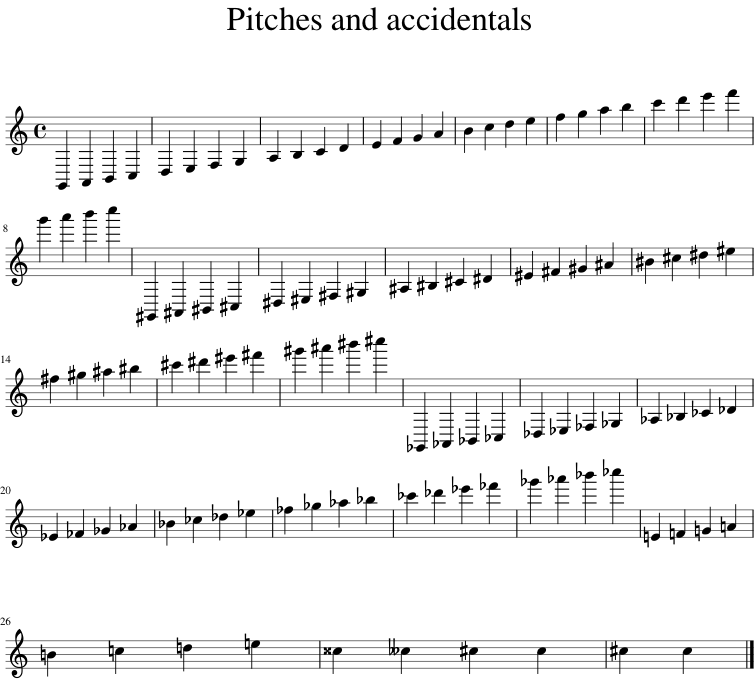

In [4]:
s('01a')

01b-Pitches-Intervals.xml

All pitch intervals in ascending jump size.


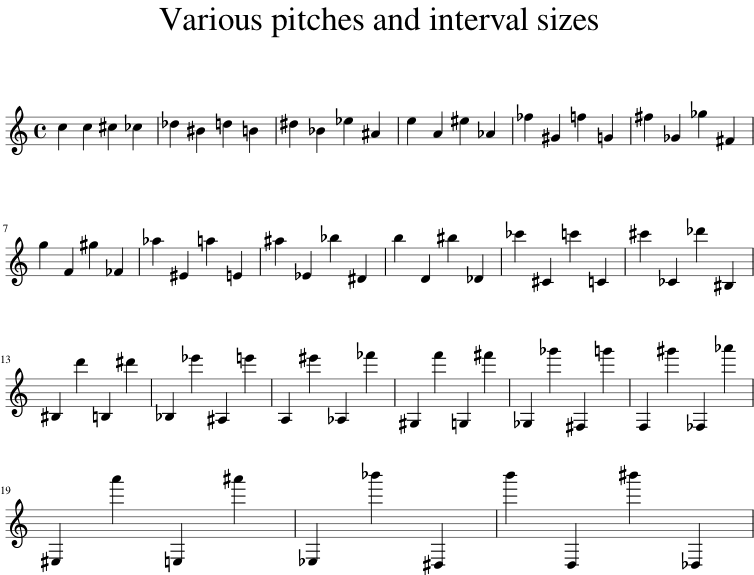

In [5]:
s('01b')

01c-Pitches-NoVoiceElement.xml

The <voice> element of notes is optional in MusicXML (although Dolet always writes it out). Here, there is one note with lyrics, but without a voice assigned. It should still be correctly converted.


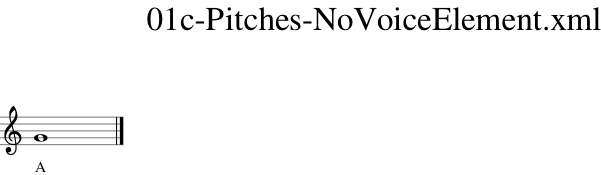

In [6]:
s('01c')

01d-Pitches-Microtones.xml

Some microtones: c flat-and-a-half, d half-flat, e half-sharp, f sharp-and-a half. Once in the lower and once in the upper region of the staff.


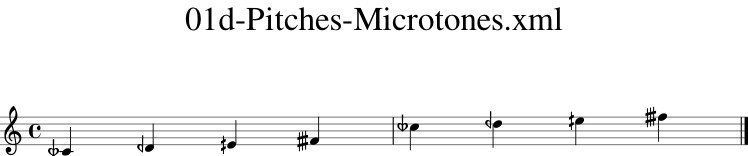

In [7]:
s('01d')

01e-Pitches-ParenthesizedAccidentals.xml

Accidentals can be cautionary or editorial. Each measure has a normal accidental, an editorial, a cautionary and an editioal and cautionary accidental.


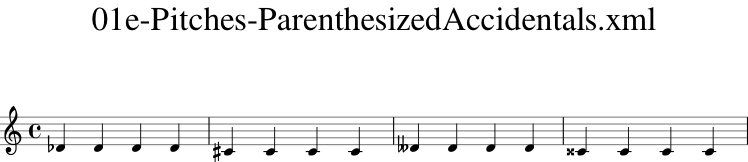

In [8]:
s('01e') # failing

01f-Pitches-ParenthesizedMicrotoneAccidentals.xml

Microtone accidentals can be cautionary or editorial. Each measure has a normal accidental, an editorial, a cautionary and an editioal and cautionary accidental.


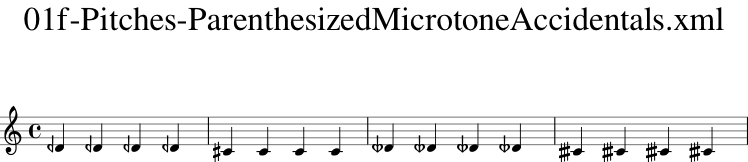

In [9]:
s('01f') # failing

## 02 ... Rests

02a-Rests-Durations.xml

All different rest lengths: A two-bar multi-measure rest, a whole rest, a half, etc. until a 128th-rest; Then the same with dotted durations.


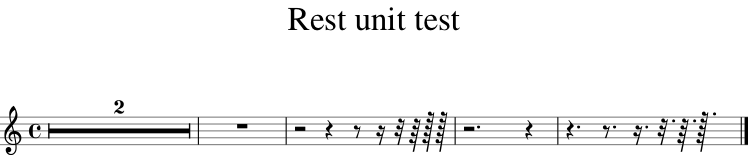

In [10]:
s('02a')

02b-Rests-PitchedRests.xml

Rests can have explicit pitches, where they are displayed. The first rest uses no explicit position and should use the default position, all others are explicitly positioned somewhere else.


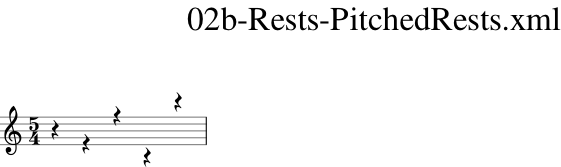

In [11]:
s('02b')

02c-Rests-MultiMeasureRests.xml

Four multi-measure rests: 3 measures, 15 measures, 1 measure, and 12 measures.


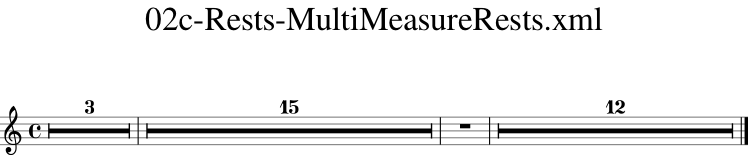

In [12]:
s('02c')

02d-Rests-Multimeasure-TimeSignatures.xml

Multi-Measure rests should always be converted into durations that are a multiple of the time signature.


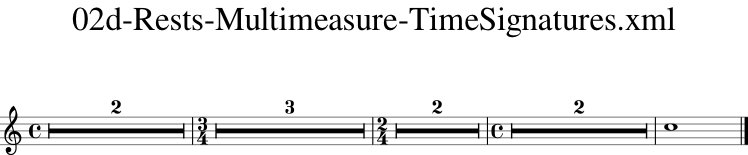

In [13]:
s('02d')

02e-Rests-NoType.xml

In some cases, a rest might not have its type attribute set (this happens, for example, with voices in Finale, where you don't manually insert a rest).


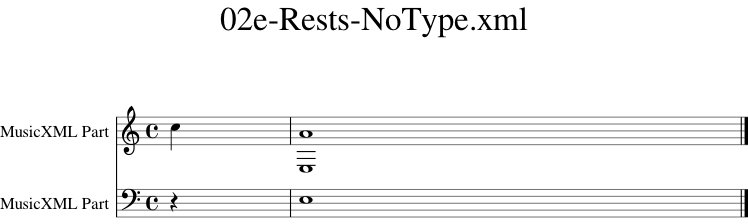

In [14]:
s('02e')

## 03 ... Rhythm

03aa-Rhythm-Durations.xml

All common note durations, from brevis, whole until 64th; First with their plain values, then dotted and finally doubly-dotted (to 32nd).


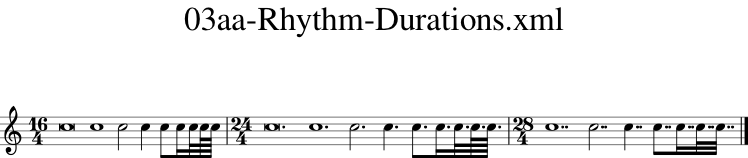

In [15]:
s('03aa')

03ab-Rhythm-Durations.xml

Extreme note durations (pre 3.0): long and 128th; First with their plain values, then dotted and finally doubly-dotted.


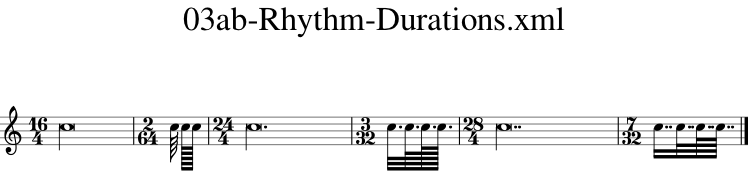

In [16]:
s('03ab')

03b-Rhythm-Backup.xml

Two voices with a backup, that does not jump to the beginning for the measure for voice 2, but somewhere in the middle. Voice 2 thus won't have any notes or rests for the first beat of the measures.


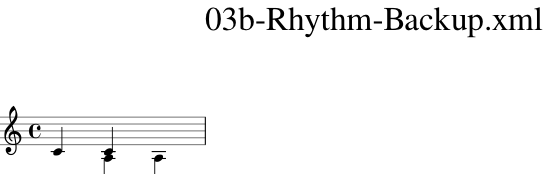

In [17]:
s('03b') # music21 creates a Rest w/ hideObjectOnPrint in this case.

03c-Rhythm-DivisionChange.xml

Although uncommon, the divisions of a quarter note can change somewhere in the middle of a MusicXML file. Here, the first half measure uses a division of 1, which then changes to 8 in the middle of the first measure and to 38 in the middle of the second measure.


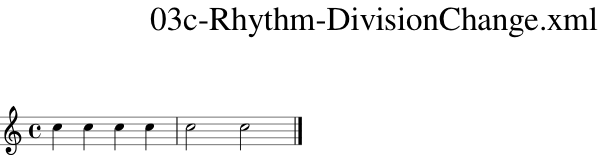

In [18]:
s('03c')

03d-Rhythm-DottedDurations-Factors.xml

Several durations can be written with dots. For multimeasure rests, we can also have durations that cannot be expressed with dotted notes (like 5/8).


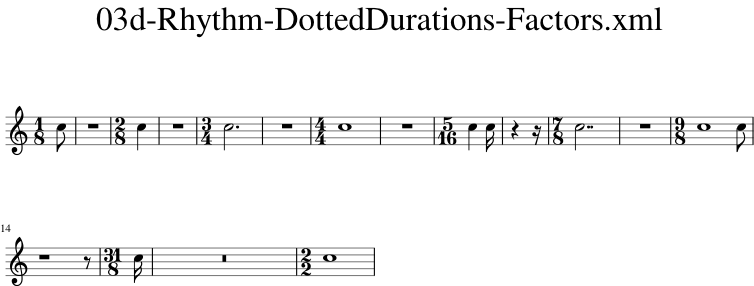

In [19]:
s('03d') # failing on 5/16, 9/8

## 11 ... Time signatures

11a-TimeSignatures.xml

Various time signatures: 2/2 (alla breve), 4/4 (C), 2/2, 3/2, 2/4, 3/4, 4/4, 5/4, 3/8, 6/8, 12/8


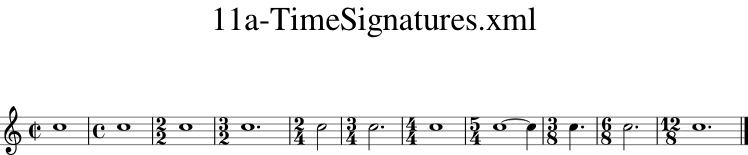

In [20]:
s('11a')

11b-TimeSignatures-NoTime.xml

A score without a time signature (but with a key and clefs)


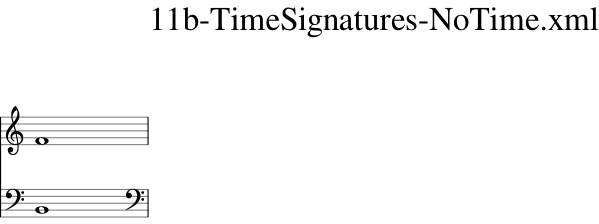

In [21]:
s('11b') # failing on additional clef...

11c-TimeSignatures-CompoundSimple.xml

Compound time signatures with same denominator: (3+2)/8 and (5+3+1)/4.


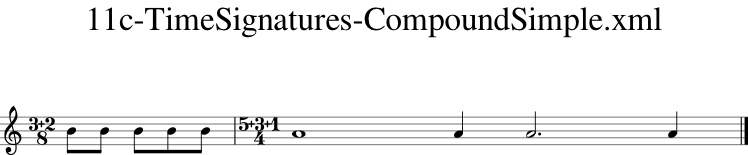

In [22]:
s('11c') # failing on beaming of first measure

11d-TimeSignatures-CompoundMultiple.xml

Compound time signatures with separate fractions displayed: 3/8+2/8+3/4 and 5/2+1/8.


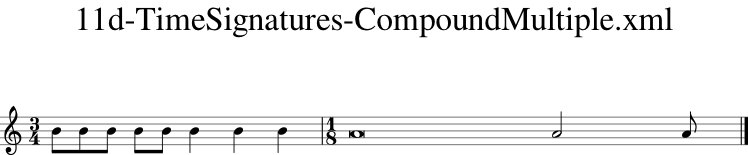

In [23]:
s('11d') # failing utterly

11e-TimeSignatures-CompoundMixed.xml

Compound time signatures of mixed type: (3+2)/8+3/4.


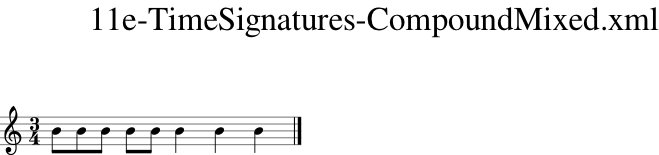

In [24]:
s('11e') # failing

11f-TimeSignatures-SymbolMeaning.xml

A time signature of 3/8 with the symbol="cut" attribute and two symbol="single-number" attributes with compound time signatures. Shall the symbol be ignored in this case?


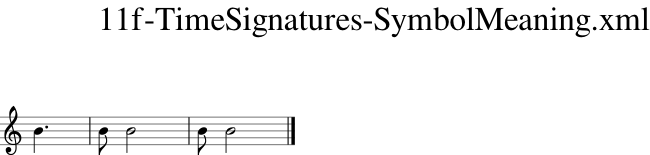

In [25]:
s('11f') # acceptable though different meaning from Lilypond

11g-TimeSignatures-SingleNumber.xml

Time signature displayed as a single number.


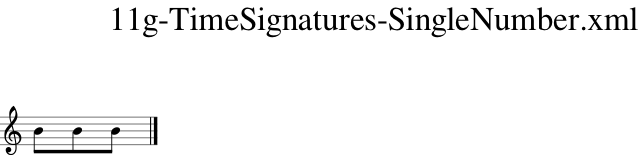

In [26]:
s('11g') # block: MuseScore

In [28]:
ts = scores['11g'].recurse().getElementsByClass('TimeSignature')[0]
ts.symbol

'single-number'

11h-TimeSignatures-SenzaMisura.xml

Senza-misura time signature


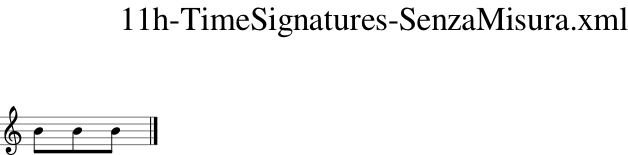

In [29]:
s('11h')

In [30]:
sc = scores['11h']
sc.recurse().getElementsByClass('SenzaMisuraTimeSignature')[0]

<music21.meter.SenzaMisuraTimeSignature>

## 12 ... Clefs

12a-Clefs.xml

Various clefs: G, C, F, percussion, TAB and none; some are also possible with transposition and on other staff lines than their default (e.g. soprano/alto/tenor/baritone C clefs); Each measure shows a different clef (measure 17 has the "none" clef), only measure 18 has the same treble clef as measure 1.


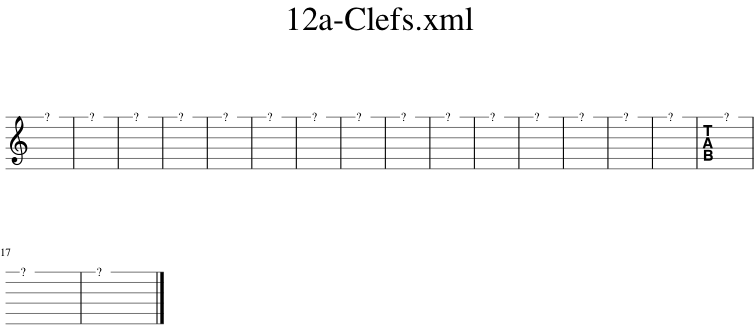

In [31]:
s('12a') # block: MuseScore -- TAB staff.

12b-Clefs-NoKeyOrClef.xml

A score without any key or clef defined. The default (4/4 in treble clef) should be used.


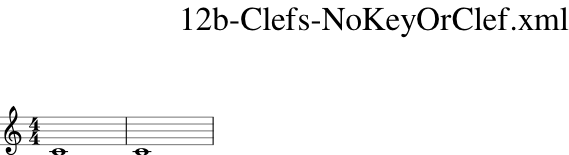

In [32]:
s('12b')

## 13 ... Key signatures

13a-KeySignatures.xml

Various key signature: from 11 flats to 11 sharps (each one first one measure in major, then one measure in minor)


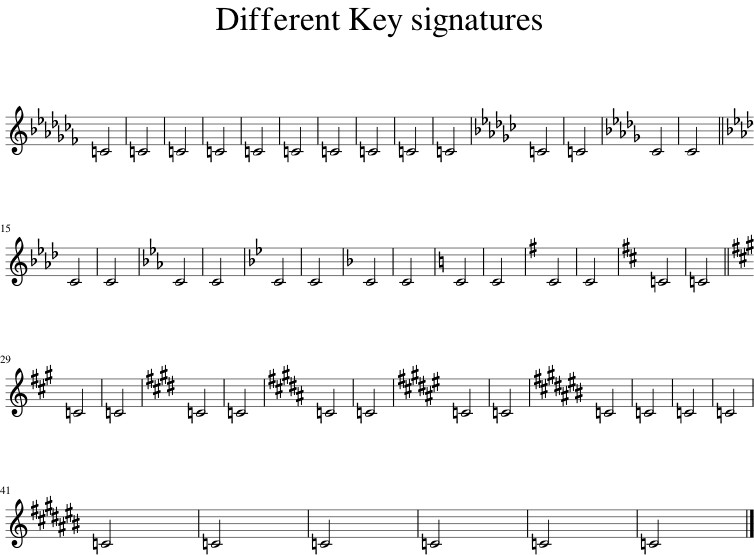

In [33]:
s('13a') # block: MuseScore

In [34]:
print([ks.sharps for ks in scores['13a'].recurse().getElementsByClass('KeySignature')])

[-11, -11, -10, -10, -9, -9, -8, -8, -7, -7, -6, -6, -5, -5, -4, -4, -3, -3, -2, -2, -1, -1, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11]


13b-KeySignatures-ChurchModes.xml

All different modes: major, minor, ionian, dorian, phrygian, lydian, mixolydian, aeolian, and locrian; All modes are given with 2 sharps.


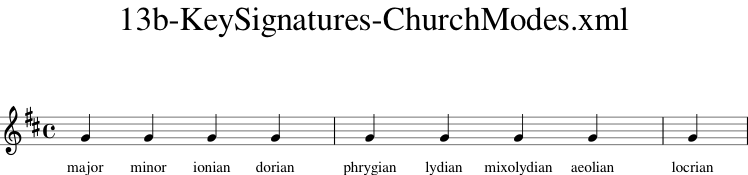

In [35]:
s('13b') # block -- mid-measure key change.

In [37]:
print([k.mode for k in scores['13b'].recurse().getElementsByClass('Key')]) # block on ionian, aeolian

['major', 'minor', 'dorian', 'phrygian', 'lydian', 'mixolydian', 'locrian']


In [38]:
s('13c')

13c-KeySignatures-NonTraditional.xml

Non-traditional key signatures, where each alteration is separately given. Here we have (f sharp, a flat, b flat) and (c flatflat, g sharp sharp, d flat, b sharp, f natural), where in the second case an explicit octave is given for each alteration.


TypeError: unorderable types: NoneType() > int()

In [39]:
s('13d')

13d-KeySignatures-Microtones.xml

Non-traditional key signatures with microtone alterations: (g flat-and-a-half, a flat, b half-flat, c natural, d half-sharp, e sharp, f sharp-and-a-half).


TypeError: unorderable types: NoneType() > int()

## 14 ... Staff attributes

14a-StaffDetails-LineChanges.xml

The number of staff lines can be modified by using the staff-lines child of the staff-details attribute. This can happen globally (the first staff has one line globally) or during the part at the beginning of a measure and even inside a measure (the second part has 5 lines initially, 4 at the beginning of the second measure, and 3 starting in the middle of the third measure).


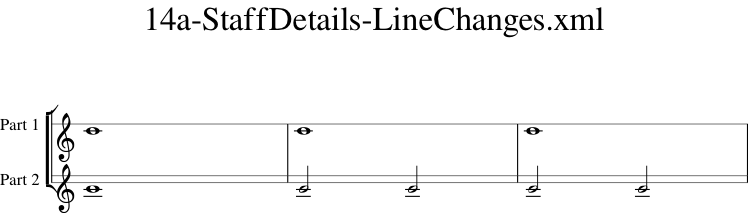

In [40]:
s('14a')

## 21 ... Chorded notes

21a-Chord-Basic.xml

One simple chord consisting of two notes.


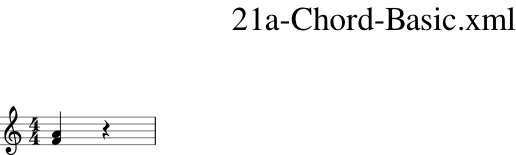

In [41]:
s('21a')

21b-Chords-TwoNotes.xml

Some subsequent (identical) two-note chords.


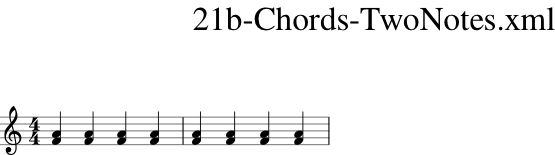

In [42]:
s('21b')

21c-Chords-ThreeNotesDuration.xml

Some three-note chords, with various durations.


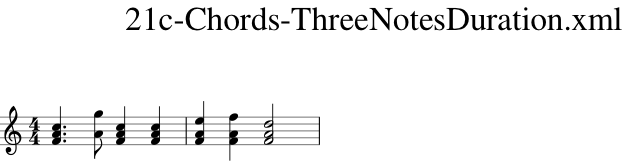

In [43]:
s('21c')

21d-Chords-SchubertStabatMater.xml

Chords in the second measure, after several ornaments in the first measure and a p at the beginning of the second measure.


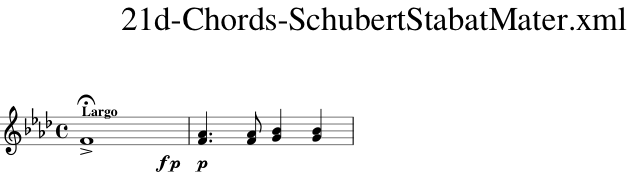

In [44]:
s('21d')

21e-Chords-PickupMeasures.xml

Check for proper chord detection after a pickup measure (i.e. the first beat of the measure is not aligned with multiples of the time signature)!


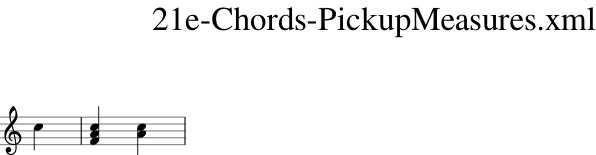

In [45]:
s('21e')

21f-Chord-ElementInBetween.xml

Between the individual notes of a chord there can be direction or harmony elements, which should be properly assigned to the chord (or the position of the chord).


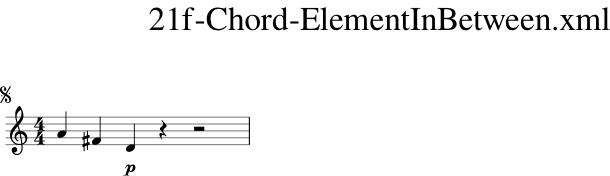

In [46]:
s('21f') # 

## 22 ... Note settings, heads, etc.

22a-Noteheads.xml

Different note styles, using the <notehead> element. First, each note head style is printed with four quarter notes, two with filled heads, two with unfilled heads, where first the stem is up and then the stem is down. After that, each note head style is printed with a half note (should have an unfilled head by default). Finally, the Aiken note head styles are tested, once with stem up and once with stem down.


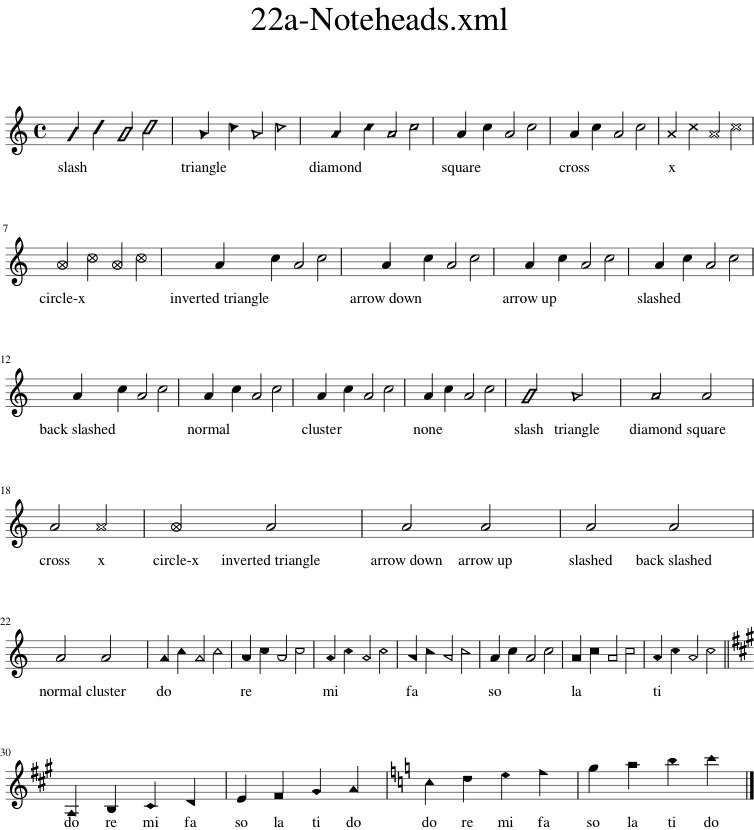

In [47]:
s('22a')

22b-Staff-Notestyles.xml

Staff-connected note styles: slash notation, hidden notes (with and without hidden staff lines)


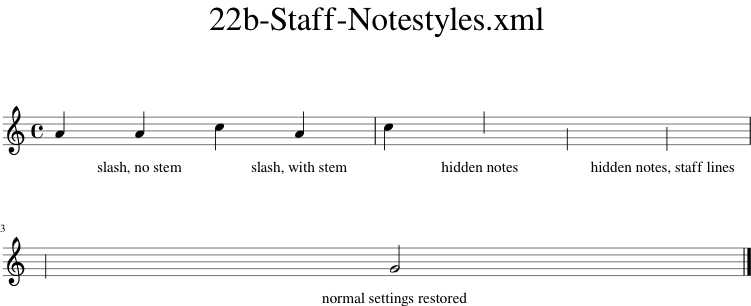

In [48]:
s('22b')

22c-Noteheads-Chords.xml

Different note styles for individual notes inside a chord, using the <notehead> element.


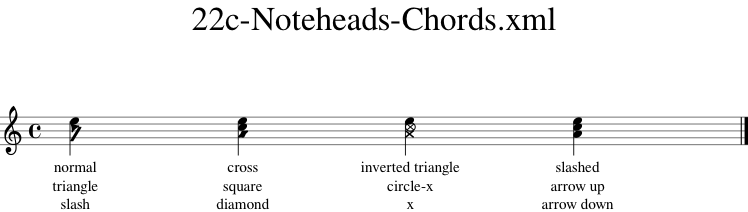

In [49]:
s('22c')

22d-Parenthesized-Noteheads.xml

Parenthesized note heads. First, a single parenthesized note is tested, once with a normal and then with a non-standard notehead, then two chords with some/all parenthesized noteheads and finally a parenthesized rest.


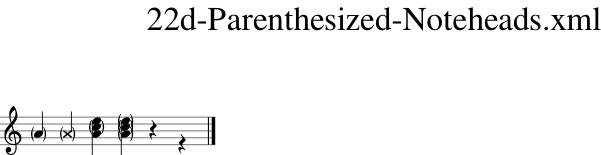

In [50]:
s('22d') # failing parenthesized rest

## 23 ... Triplets, Tuplets

23a-Tuplets.xml

Some tuplets (3:2, 3:2, 3:2, 4:2, 4:1, 7:3, 6:2) with the default tuplet bracket displaying the number of actual notes played. The second tuplet does not have a number attribute set.


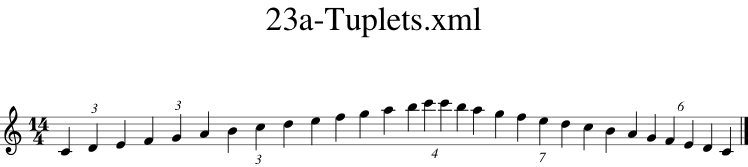

In [51]:
s('23a') # failing, brackets.

23b-Tuplets-Styles.xml

Different tuplet styles: default, none, x:y, x:y-note; Each with bracket, slur and none. Finally, non-standard 4:3 and 17:2 tuplets are given.


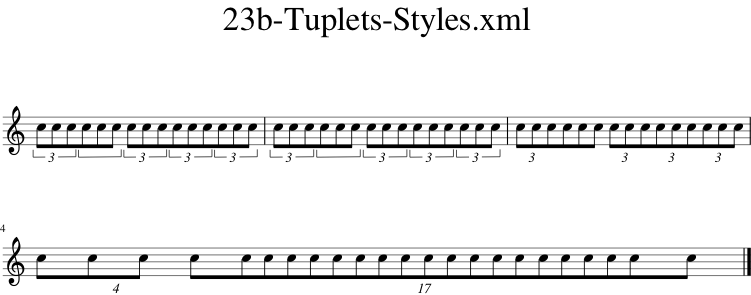

In [52]:
s('23b') # failing

23c-Tuplet-Display-NonStandard.xml

Displaying tuplet note types, that might not coincide with the displayed note. The first two tuplets take the type from the note, the second two from the <time-modification> element, the remaining pair of tuplets from the <tuplet> notation element. The tuplets in measure 3 specify both a number of notes and a type inside the <tuplet-actual> and <tuplet-normal> elements, the ones in measure 4 specify only a note type (but no number), and the ones in measure 5 specify only a number of tuplet-notes (but no type, which is deduced from the note's type). The first tuplet of measures 3-5 uses 'display-type="actual"', the second one 'display-type="both"'. FIXME: The tuplet-normal should coincide with the real notes!


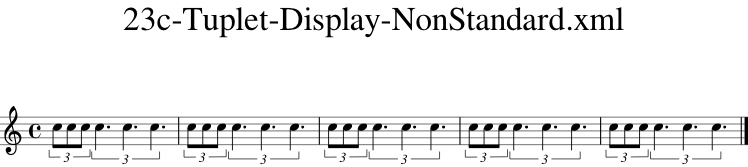

In [53]:
s('23c') # failing

23d-Tuplets-Nested.xml

Tuplets can be nested. Here there is a 5:2 tuplet inside a 3:2 tuple (all consisting of written eighth notes).


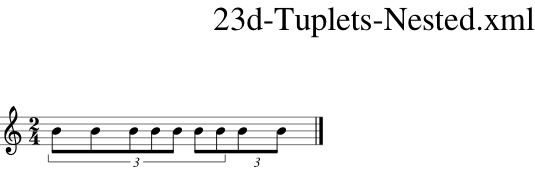

In [54]:
s('23d') # failing -- no nested tuplets yet.

23e-Tuplets-Tremolo.xml

Tremolo tuplets are tuplets on single notes with a tremolo ornament. The application shall correctly import these notes with 2/3 or their time...


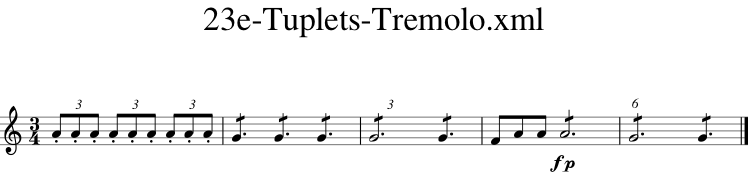

In [55]:
s('23e') # working?

23f-Tuplets-DurationButNoBracket.xml

Some "triplets" on the end of the first and in the second staff, using only <time-modification>, but not explicit tuplet bracket. Thus, the duration of the notes in the second staff should be scaled properly in comparison to staff 1, but no visual indication about the tuplets is given.


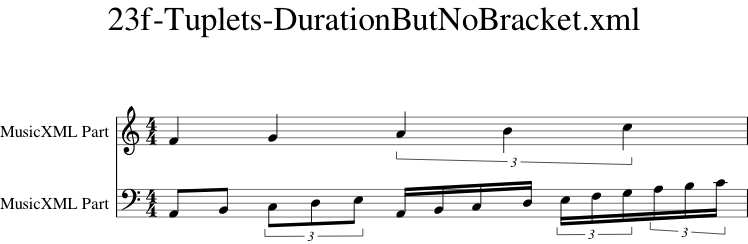

In [56]:
s('23f') # failing brackets shown

## 24 ... Grace notes

24a-GraceNotes.xml

Different kinds of grace notes: acciaccatura, appoggiatura; beamed grace notes; grace notes with accidentals; different durations of the grace notes.


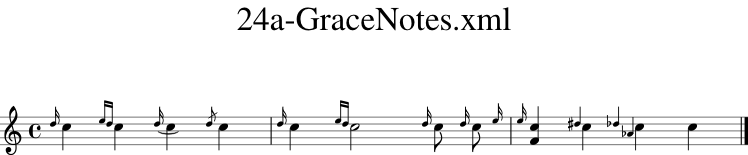

In [57]:
s('24a') # are slurs default?

24b-ChordAsGraceNote.xml

Chords as grace notes.


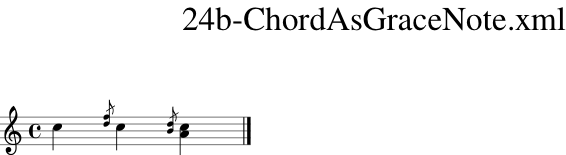

In [58]:
s('24b')

24c-GraceNote-MeasureEnd.xml

A grace note that appears at the measure end (without any steal-from-* attribute set). Some applications need to convert this into an after-grace.


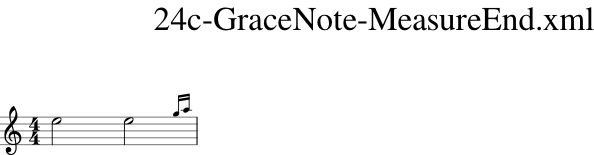

In [59]:
s('24c')

24d-AfterGrace.xml

Some grace notes and after-graces (indicated by steal-time-previous and steal-time-following).


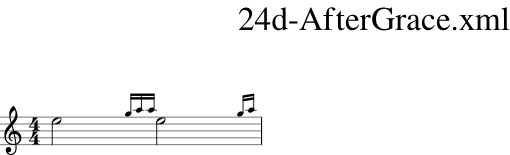

In [60]:
s('24d')

24e-GraceNote-StaffChange.xml

A grace note on a different staff than the actual note.


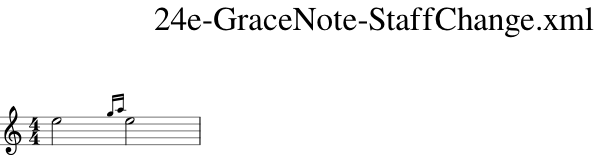

In [61]:
s('24e')

24f-GraceNote-Slur.xml

A grace note with a slur to the actual note. This can be interpreted as acciaccatura or appoggiatura, depending on the existence of a slash.


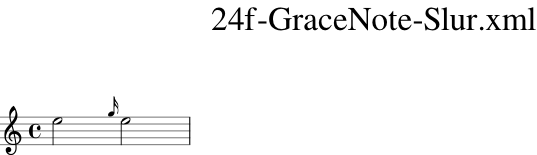

In [62]:
s('24f')

## 31 ... Dynamics and other single symbols

31a-Directions.xml

All <direction> elements defined in MusicXML. The lyrics for each note describes the direction element assigned to that note.


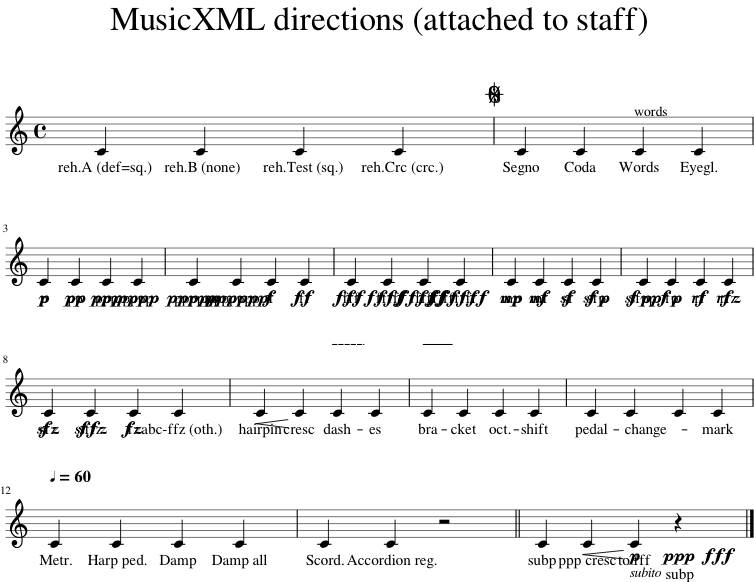

In [63]:
s('31a') # todo, split...

31c-MetronomeMarks.xml

Tempo Markings: note=bpm, text (note=bpm), note=note, (note=note), (note=bpm)


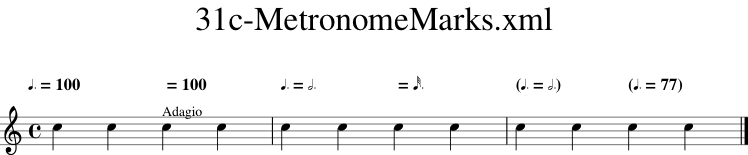

In [64]:
s('31c') # todo, split

## 32 ... Notations and Articulations

32a-Notations.xml

All <notation> elements defined in MusicXML. The lyrics show the notation assigned to each note.


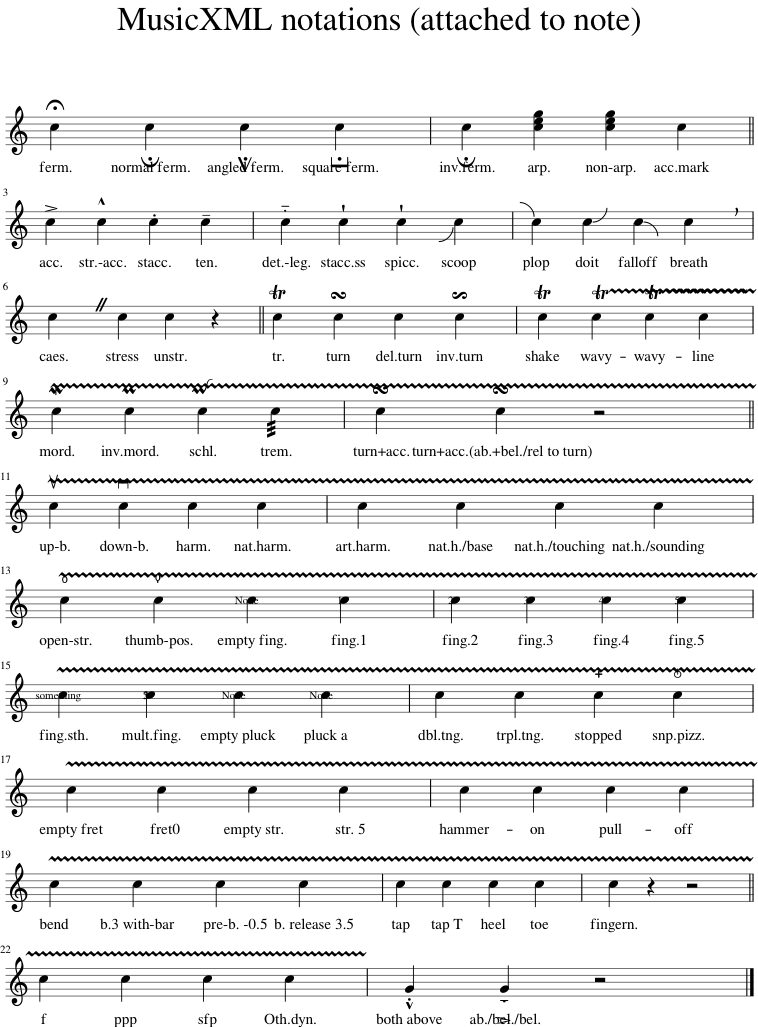

In [65]:
s('32a') # todo-split

32b-Articulations-Texts.xml

Text markup: different font sizes, weights and colors.


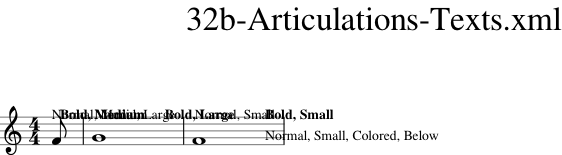

In [66]:
s('32b') # todo split

32c-MultipleNotationChildren.xml

 It should not make any difference whether two articulations are given inside two different notation elements, inside two different articulations children of the same notation element or inside the same articulations element. Thus, all three notes should have a staccato and an accent. 


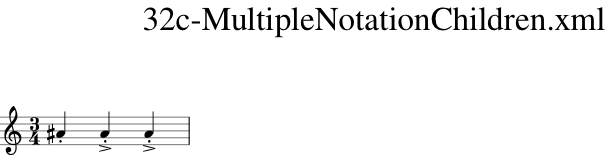

In [67]:
s('32c') # failing first note

32d-Arpeggio.xml

Different Arpeggio directions (normal, up, down, non-arpeggiate)


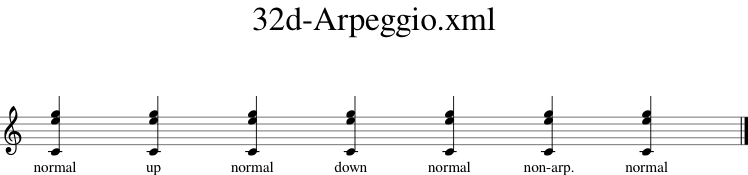

In [68]:
s('32d') # not supported

## 33 ... Spanners

33a-Spanners.xml

Several spanners defined in MusicXML: tuplet, slur (solid, dashed), tie, wedge (cresc, dim), tr + wavy-line, single-note trill spanner, octave-shift (8va,15mb), bracket (solid down/down, dashed down/down, solid none/down, dashed none/up, solid none/none), dashes, glissando (wavy), bend-alter, slide (solid), grouping, two-note tremolo, hammer-on, pull-off, pedal (down, change, up).


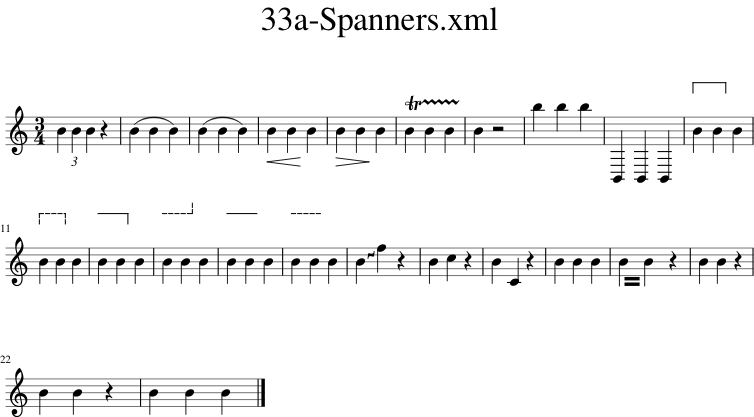

In [69]:
s('33a')

33b-Spanners-Tie.xml

Two simple tied whole notes


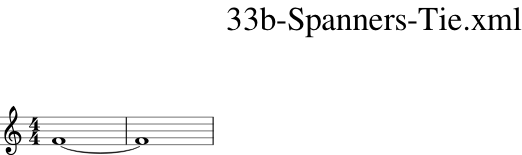

In [70]:
s('33b') # not necessarily a spanner except in Lilypond

33c-Spanners-Slurs.xml

A note can be the end of one slur and the start of a new slur. Also, in MusicXML, nested slurs are possible like in the second measure where one slur goes over all four notes, and another slur goes from the second to the third note.


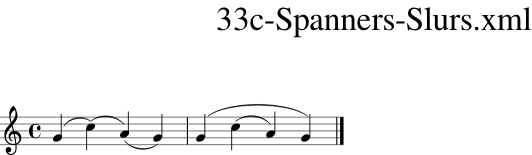

In [71]:
s('33c')

33d-Spanners-OctaveShifts.xml

All types of octave shifts (15ma, 15mb, 8va, 8vb)


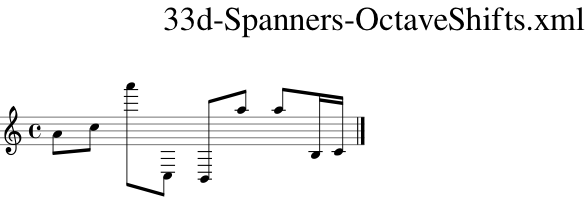

In [72]:
s('33d') # overinterpreting.

33e-Spanners-OctaveShifts-InvalidSize.xml

Invalid octave-shifts: 27 down, 11 up.


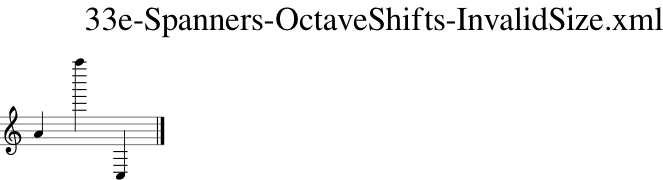

In [73]:
s('33e') # check if actually invalid

33f-Trill-EndingOnGraceNote.xml

A trill spanner that spans a grace note and ends on an after-grace note at the end of the measure.


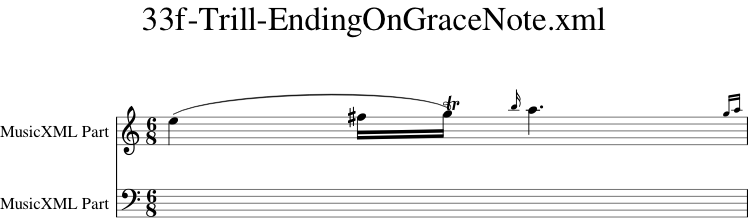

In [74]:
s('33f') # blocking: MuseScore, I think...

33g-Slur-ChordedNotes.xml

Slurs on chorded notes: Only the first note of the chord should get the slur notation. Some applications print out the slur for all notes -- these should be ignored. Edited by MSC to not reuse the same slur number in generating the overlapping slurs. 


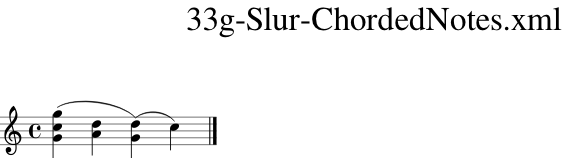

In [75]:
s('33g')

33h-Spanners-Glissando.xml

All different types of glissando defined in MusicXML


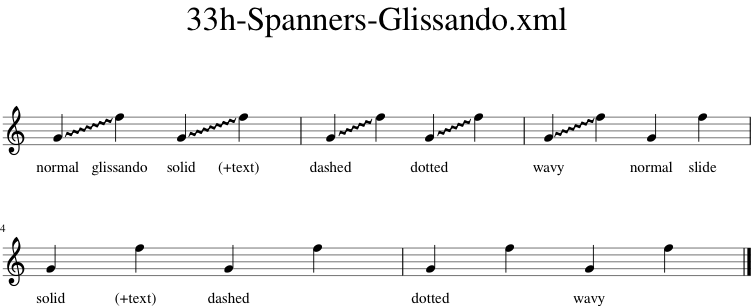

In [76]:
s('33h')

33i-Ties-NotEnded.xml

Several ties that have their end tag missing.


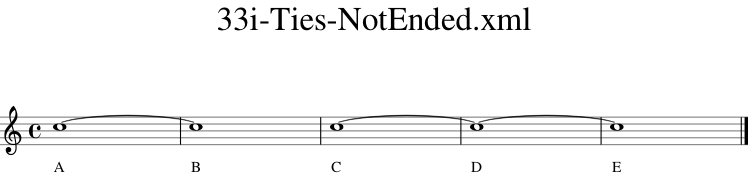

In [77]:
s('33i')

## 41 ... Multiple parts (staves)

41a-MultiParts-Partorder.xml

A piece with four parts (P0, P1, P2, P3; different from what Finale creates!). Are they converted in the correct order?


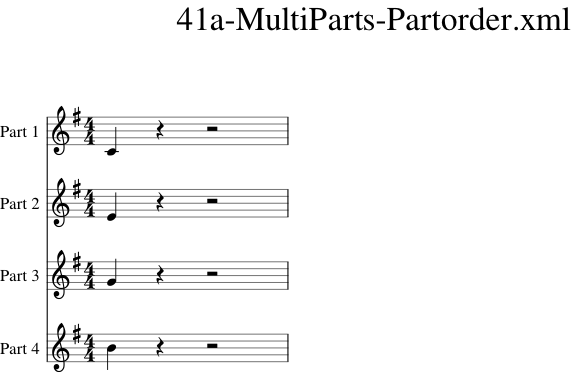

In [78]:
s('41a')

41b-MultiParts-MoreThan10.xml

A piece with 20 parts to check whether an application supports that many parts and whether they are correctly sorted.


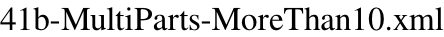

In [79]:
s('41b') # blocking: MuseScore? needs instruments?

41c-StaffGroups.xml

A huge orchestra score with 28 parts and different kinds of nested bracketed groups. Each part/group is assigned a name and an abbreviation to be shown before the staff. Also, most of the groups show unbroken barlines, while the barlines are broken between the groups.


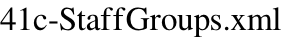

In [80]:
s('41c')

41d-StaffGroups-Nested.xml

Two properly nested part groups: One group (with a square bracket) goes from staff 2 to 4) and another group (with a curly bracket) goes from staff 3 to 4.


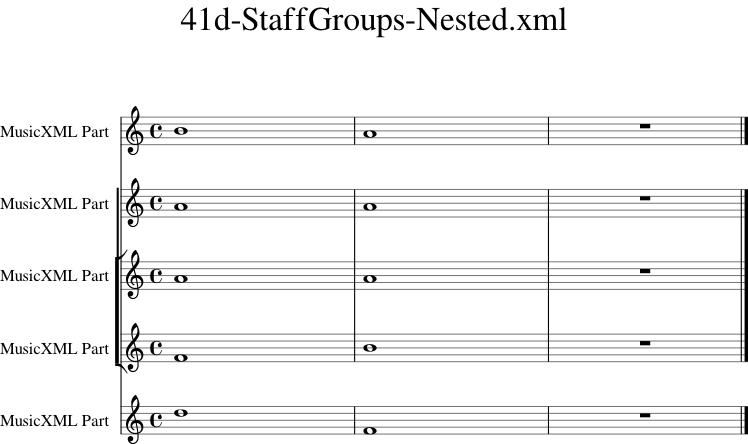

In [81]:
s('41d')

41e-StaffGroups-InstrumentNames-Linebroken.xml

Part names and abbreviations can contain line breaks.


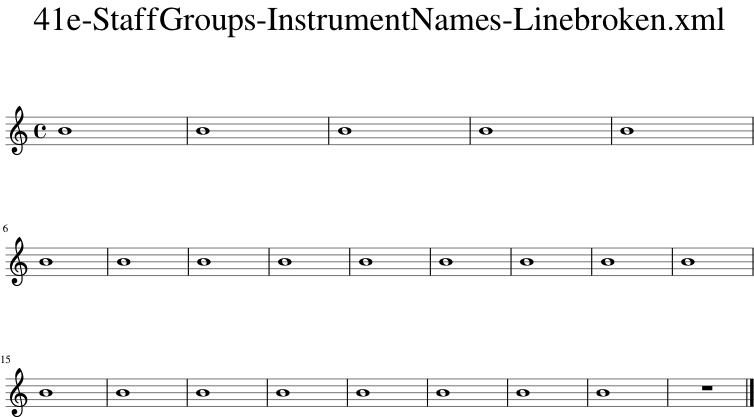

In [82]:
s('41e')

41f-StaffGroups-Overlapping.xml

MusicXML allows for overlapping part-groups, while many applications do not allow overlapping groups, but require them to be properly nested. In this case, one group (with a square bracket) goes from staff 2 to 4) and another group (with a curly bracket) goes from staff 3 to 5.


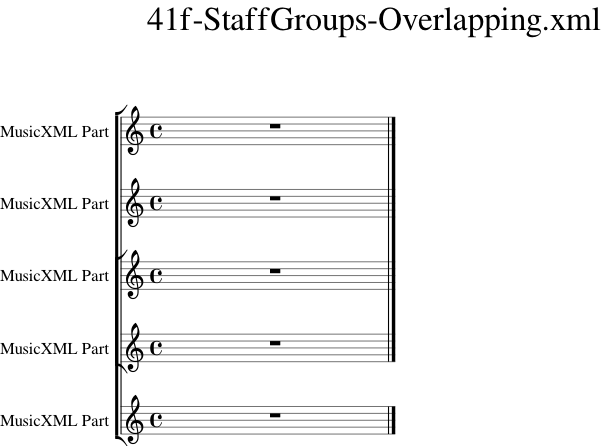

In [83]:
s('41f')

41g-PartNoId.xml

A part with no id attribute. Since this piece has only one part, it is clear which part is described by the one part element.


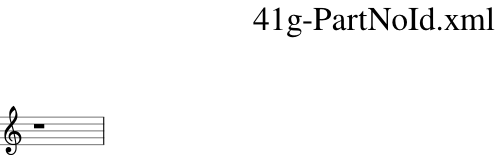

In [84]:
s('41g')

musicxml.xmlToM21: WARNING: Cannot find info for part with name P3, skipping the part
musicxml.xmlToM21: WARNING: Cannot find info for part with name P4, skipping the part


41h-TooManyParts.xml

This piece has more part elements than the part-list section gives. One can either convert all the parts present, but not listed in the part-list, or simply not import / ignore them.


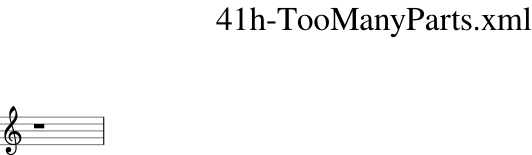

In [85]:
s('41h')

41i-PartNameDisplay-Override.xml

MusicXML allows part-name and part-name-display in the score-part element. If part-name-display is given, it overrides the part-name for display. The first staff uses only part-name, while the second one (same part-name) overrides it with a custom text. Similar for the part-abbreviation used in subsequent staves. 


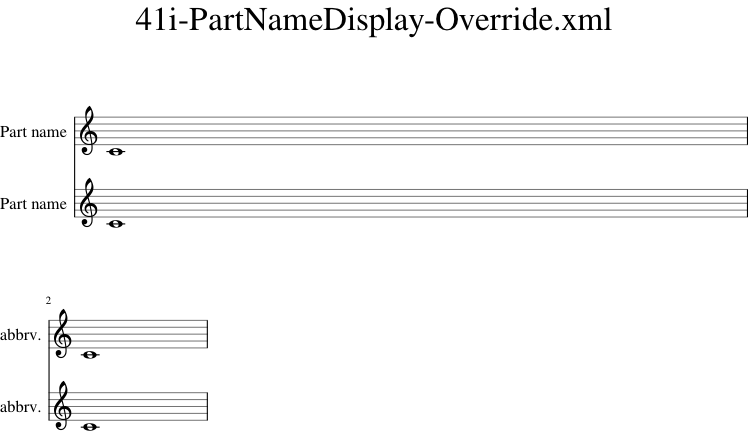

In [86]:
s('41i')

## 42 ... Multiple voices per staff

42a-MultiVoice-TwoVoicesOnStaff-Lyrics.xml

Two voices share one staff. Each voice is assigned some lyrics.


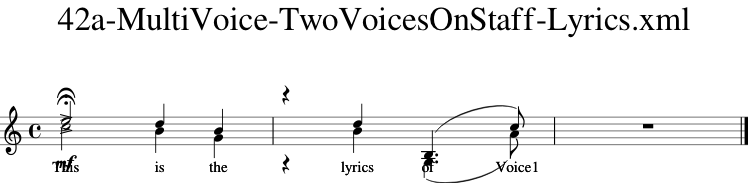

In [87]:
s('42a')

42b-MultiVoice-MidMeasureClefChange.xml

A multi-voice / multi-staff part with a clef change in the middle of a measure and a <backward> for voice 2 jumping back beyond that clef change.


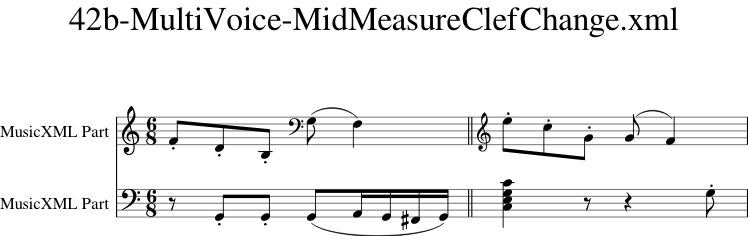

In [88]:
s('42b')

## 43 ... One part on multiple staves

43a-PianoStaff.xml

A simple piano staff


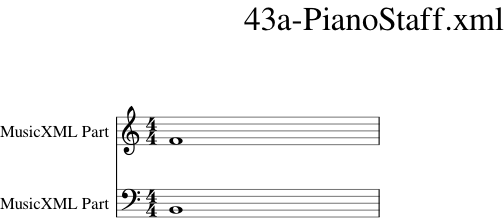

In [89]:
s('43a')

43b-MultiStaff-DifferentKeys.xml

A piano staff with different keys and clefs for each of its staves. The keys and clefs for both staves are given at the very beginning of the measure.


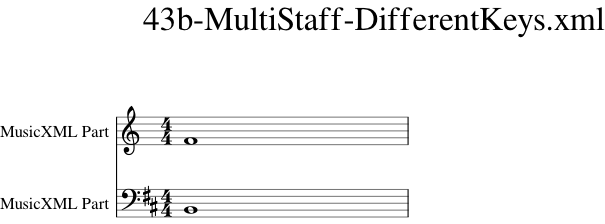

In [90]:
s('43b')

43c-MultiStaff-DifferentKeysAfterBackup.xml

A piano staff with different keys and clefs for each of its staves. The key and clef for the second staff is given only after a backward, just before the first note of the second staff is given, but after the whole measure for staff 1 has been given.


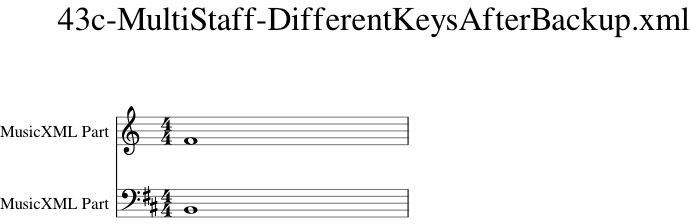

In [91]:
s('43c')

43d-MultiStaff-StaffChange.xml

Staff changes in a piano staff. The voice from the second staff has some notes/chords on the first staff. The final two chords have some notes on the first, some on the second staff.


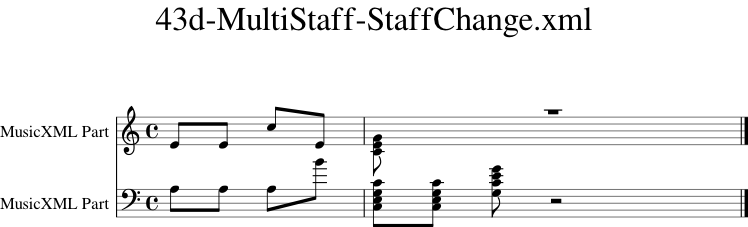

In [92]:
s('43d')

43e-Multistaff-ClefDynamics.xml

A piano staff with dynamics and clef changes, where each element (ffff, wedge and clef changes) applies only to one voice or one staff, respectively.


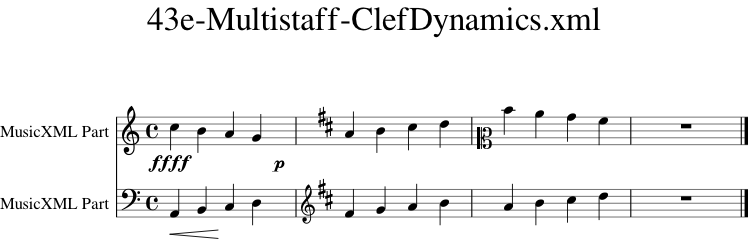

In [93]:
s('43e')

## 45 ... Repeats

45a-SimpleRepeat.xml

A simple, repeated measure (repeated 5 times)


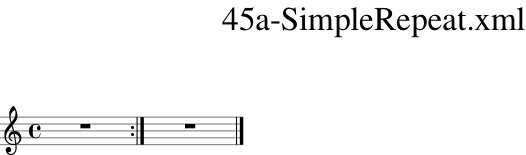

In [94]:
s('45a')

45b-RepeatWithAlternatives.xml

A simple repeat with two alternative endings (volta brackets).


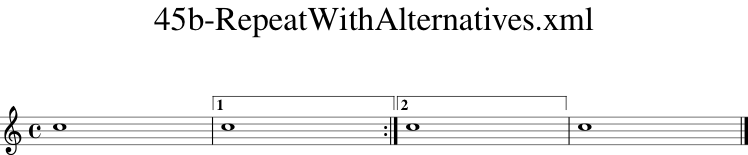

In [95]:
s('45b')

45c-RepeatMultipleTimes.xml

Repeats can also be nested.


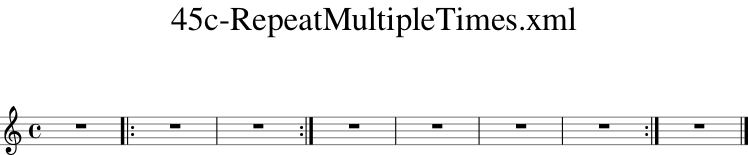

In [96]:
s('45c')

In [97]:
print(musicxmlOut['45c'])

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE score-partwise
  PUBLIC '-//Recordare//DTD MusicXML 2.0 Partwise//EN'
  'http://www.musicxml.org/dtds/partwise.dtd'>
<score-partwise>
  <work>
    <work-title>45c-RepeatMultipleTimes.xml</work-title>
  </work>
  <movement-title>45c-RepeatMultipleTimes.xml</movement-title>
  <identification>
    <creator type="composer">Music21</creator>
    <encoding>
      <encoding-date>2016-08-13</encoding-date>
      <software>Music21</software>
    </encoding>
  </identification>
  <defaults>
    <scaling>
      <millimeters>7</millimeters>
      <tenths>40</tenths>
    </scaling>
  </defaults>
  <part-list>
    <score-part id="P1">
      <part-name>MusicXML Part</part-name>
    </score-part>
  </part-list>
  <part id="P1">
    <measure number="1">
      <attributes>
        <divisions>10080</divisions>
        <key>
          <fifths>0</fifths>
          <mode>major</mode>
        </key>
        <time symbol="common">
          <beats>4</beats>
   

45d-Repeats-Nested-Alternatives.xml

Nested repeats, each with alternative endings.


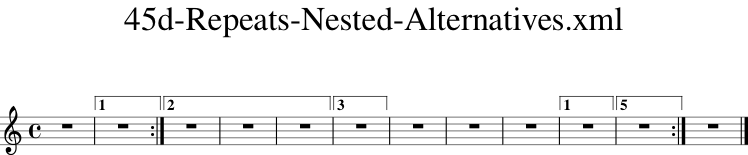

In [98]:
s('45d')

45e-Repeats-Nested-Alternatives.xml

Some more nested repeats with alternatives. The barline between measure 7 and 8 will probably be messed up! (Should be a repeat on both sides!)


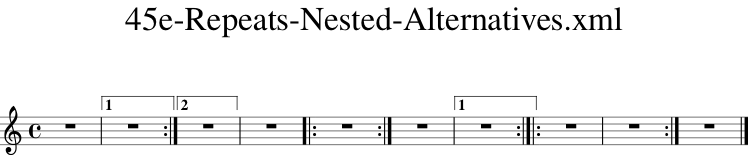

In [99]:
s('45e')

45f-Repeats-InvalidEndings.xml

Some more nested repeats with alternatives, where the MusicXML file does not make sense in the first place. How well are applications able to cope with improper repeats and alternatives?


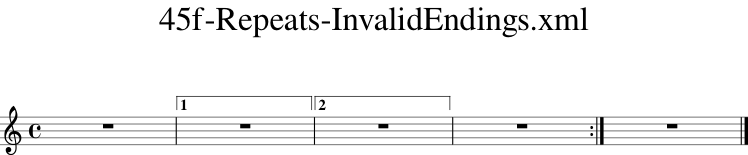

In [100]:
s('45f')

45g-Repeats-NotEnded.xml

A forward-repeating bar line without an ending repeat bar.


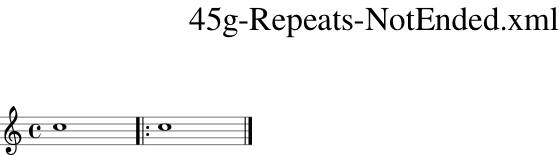

In [101]:
s('45g')

## 46 ... Barlines, Measures

46a-Barlines.xml

Different types of (non-repeat) barlines: default (no setting), regular, dotted, dashed, heavy, light-light, light-heavy, heavy-light, heavy-heavy, tick, short, none.


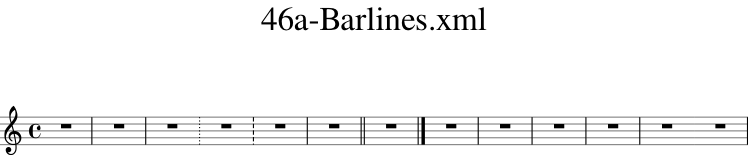

In [102]:
s('46a')

46b-MidmeasureBarline.xml

Barlines can appear at mid-measure positions, without using an implicit measure!


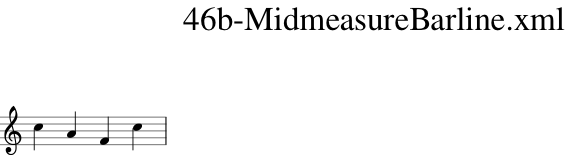

In [103]:
s('46b')

46c-Midmeasure-Clef.xml

A clef change in the middle of a measure, using either an implicit measure or simply placing the attributes in the middle of the measure.


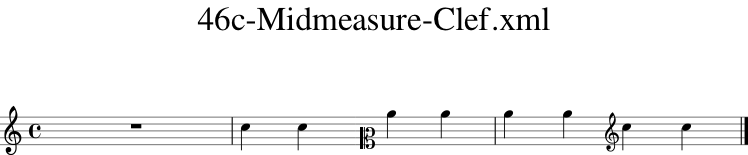

In [104]:
s('46c')

46d-PickupMeasure-ImplicitMeasures.xml

A 3/8 pickup measure, a measure that is split into one (incomplete, only 2/4) measure and an implicit measure, and an incomplete measure (containg 3/4).


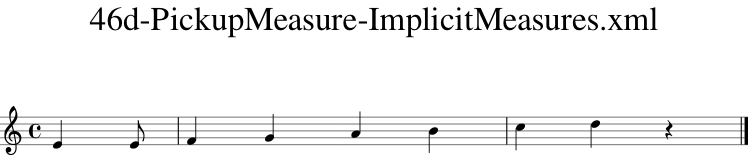

In [105]:
s('46d')

46e-PickupMeasure-SecondVoiceStartsLater.xml

Voice 2 should start at 2nd beat of first full measure.


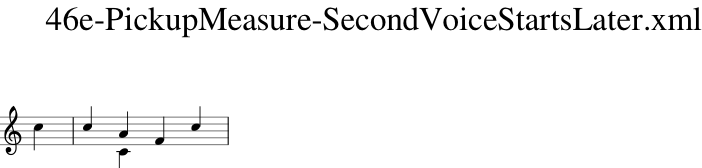

In [106]:
s('46e')

46f-IncompleteMeasures.xml

Measures can contain less notes than the time signature says. Here, the first and third measures contain only two quarters instead of four.


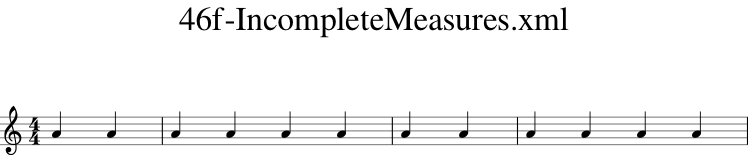

In [107]:
s('46f')

46g-PickupMeasure-Chordnames-FiguredBass.xml

Pickup measure with chord names and figured bass.


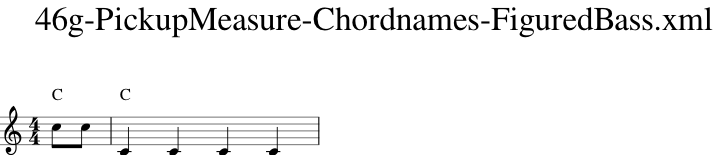

In [108]:
s('46g')

## 51 ... Header information

51b-Header-Quotes.xml

Several header fields and part names can contain quotes ("). This test checks whether they are converted/imported without problems (i.e. whether they are correctly escaped when converting).


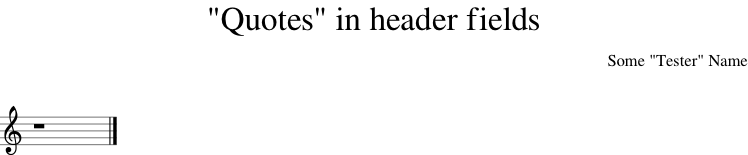

In [109]:
s('51b')

51c-MultipleRights.xml

There can be multiple <rights> tags in the identification element of the score. The conversion shall still work, ideally using both of them.


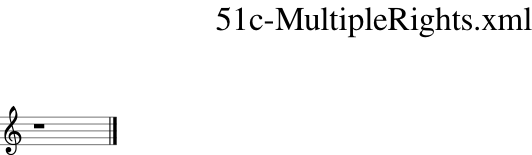

In [110]:
s('51c')

51d-EmptyTitle.xml

A piece with an empty (but existing) work-title, but a non-empty movement-title. In this case the movement-title should be chosen, even though the work-title exists.


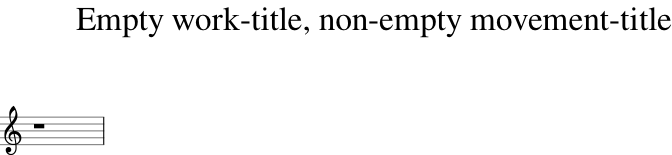

In [111]:
s('51d')

## 52 ... Page layout

52a-PageLayout.xml

Several page layout settings: paper size, margins, system margins and distances, different fonts, etc.


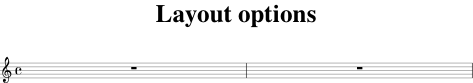

In [112]:
s('52a') # block: ipython21 -- only gives first png image.

52b-Breaks.xml

System and page breaks, given in a <print> element


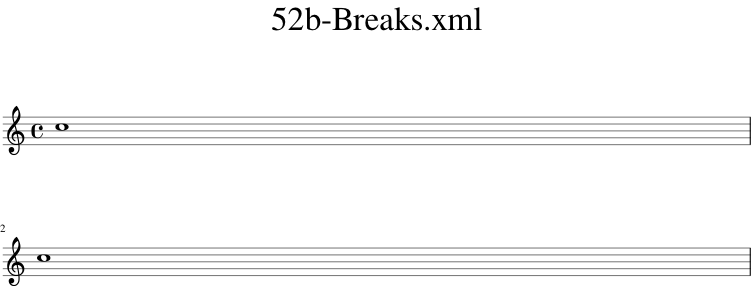

In [113]:
s('52b') # block: ipython21 -- only gives first png image.

## 61 ... Lyrics

61a-Lyrics.xml

Some notes with simple lyrics: Syllables, notes without a syllable, syllable spanners.


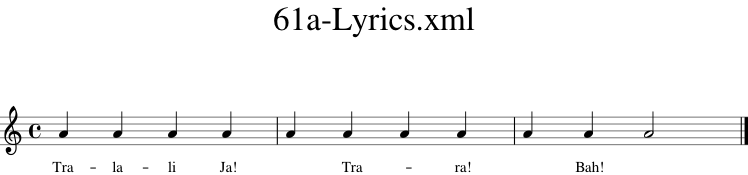

In [114]:
s('61a')

61b-MultipleLyrics.xml

Multiple (simple) lyrics. The order of the exported stanzas is relevant (identified by the number attribute in this test case)


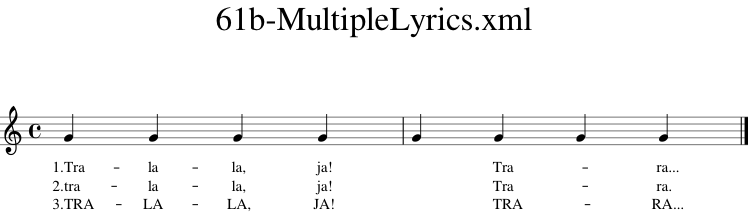

In [115]:
s('61b')

61c-Lyrics-Pianostaff.xml

Lyrics assigned to the voices of a piano staff containing two simple staves. Each staff is assigned exactly one lyrics line.


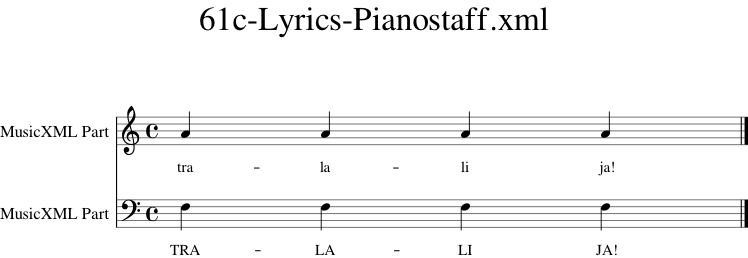

In [116]:
s('61c')

61d-Lyrics-Melisma.xml

How to treat lyrics and slurred notes. Normally, a slurred group of notes is assigned only one lyrics syllable.


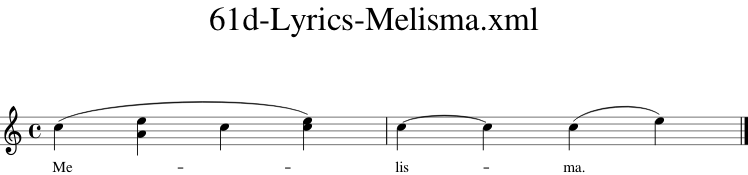

In [117]:
s('61d')

61e-Lyrics-Chords.xml

Assigning lyrics to chorded notes.


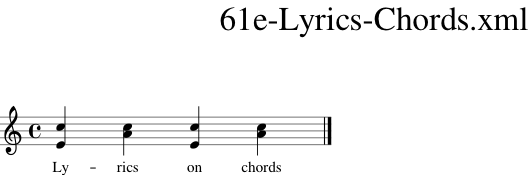

In [118]:
s('61e')

61f-Lyrics-GracedNotes.xml

Grace notes shall not mess up the lyrics, and they shall not be assigned a syllable.


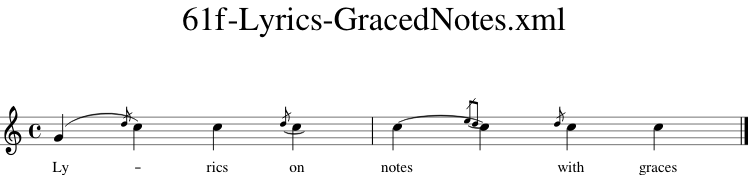

In [119]:
s('61f')

61g-Lyrics-NameNumber.xml

A lyrics syllable can have both a number and a name attribute. The question is: What should be used to put syllables of the same voice together. This example uses different number/name combinations to check how different applications handle this unspecified case (The advice on the MusicXML mailing list was "there is no correct way, each application can do what it thinks is best").


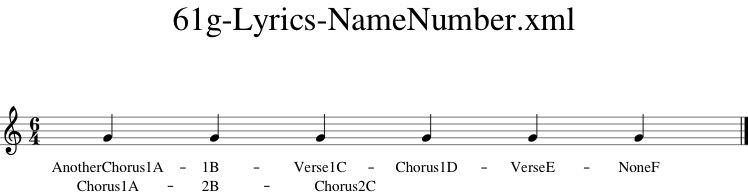

In [120]:
s('61g')

61h-Lyrics-BeamsMelismata.xml

Beaming or slurs can indicate melismata for lyrics. Also make sure that notes without an explicit syllable are treated as if they were part of a melisma.


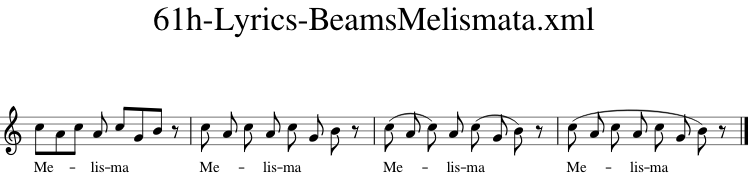

In [121]:
s('61h')

61i-Lyrics-Chords.xml

Each note of a chord can have some lyrics attached. In this case, each note of the chord has lyrics of the form "Lyrics [123]" attached, where each lyrics has a different number attribute to distinguish them. These syllables should be imported into three different stanzas and the timing should be correct.


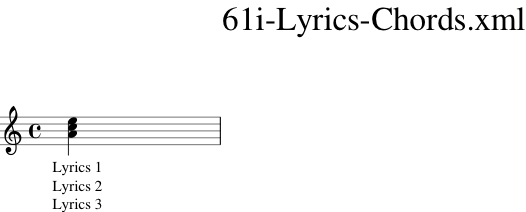

In [122]:
s('61i')

61j-Lyrics-Elisions.xml

Multiple lyrics syllables assigned to a single note are implemented either using a space in the lyrics or by using the <elision> lyrics element. This testcase checks both of them. First, a note with on syllable is given, then a note with two syllables separated by a spcae and finally a note with two and one with three syllables implemented using <elision> is given.


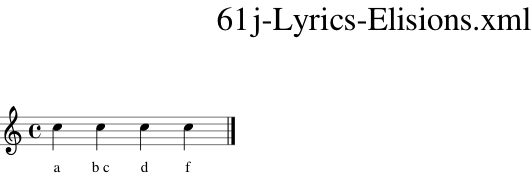

In [123]:
s('61j')

61k-Lyrics-SpannersExtenders.xml

Lyrics spanners: continued syllables and extenders, possibly spanning multiple notes. The intermediate notes do not have any <lyric> element.


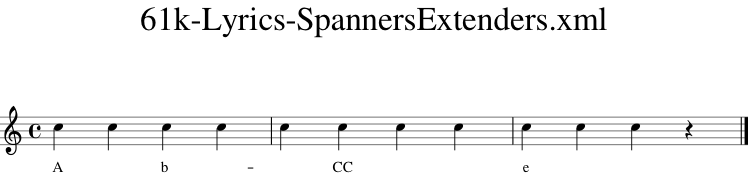

In [124]:
s('61k')

## 71 ... Guitar notation

71a-Chordnames.xml

A normal staff with several (complex) chord names displayed.


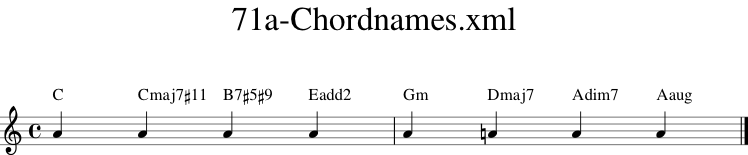

In [125]:
s('71a')

71c-ChordsFrets.xml

A staff with chord names and some fretboards shown. The fretboards can have an arbitrary number of frets/strings, can start at an arbitrary fret and can even contain fingering information.


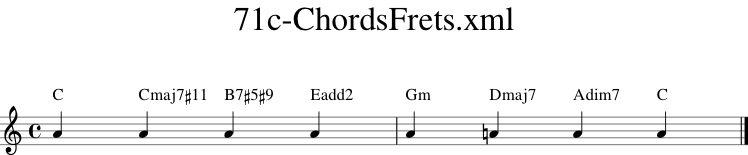

In [126]:
s('71c')

71d-ChordsFrets-Multistaff.xml

Chords and fretboards assigned to the voices in a multi-voice, multi-staff part. There should be fret diagrams above each of the two staves.


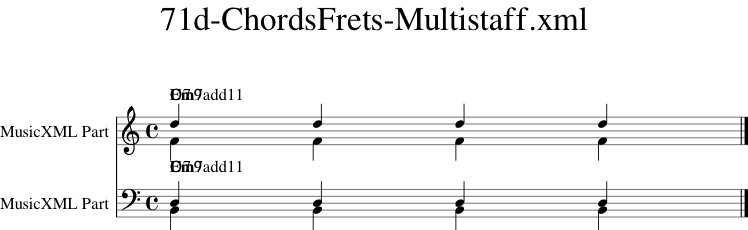

In [127]:
s('71d')

71e-TabStaves.xml

Some tablature staves, with explicit fingering information and different string tunings given in the MusicXML file.


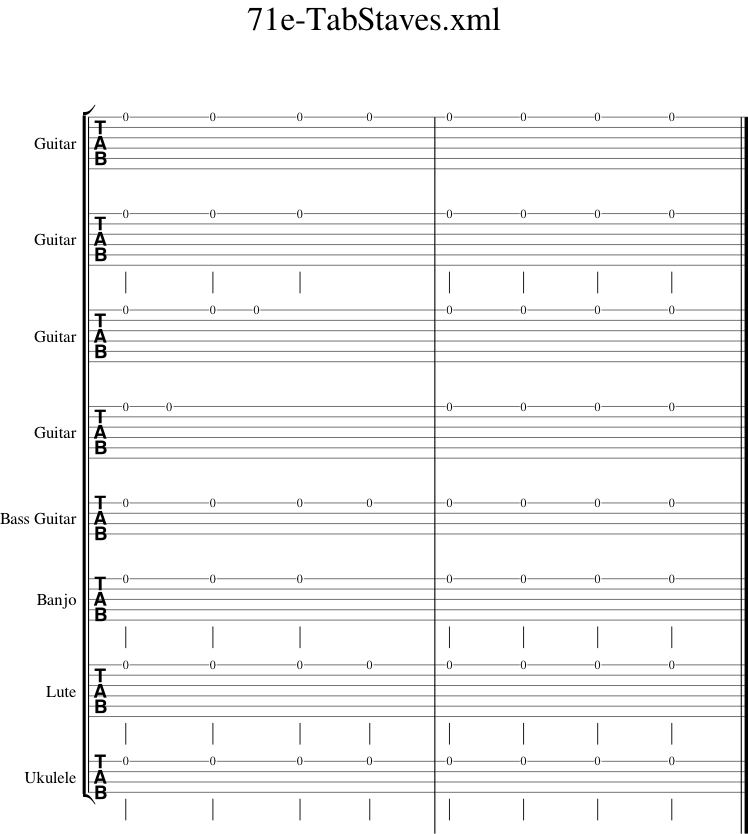

In [128]:
s('71e')

71f-AllChordTypes.xml

All chord types defined in MusicXML. The staff will only contain one c' note (NO chord) for all of them, but the chord names should be properly printed.


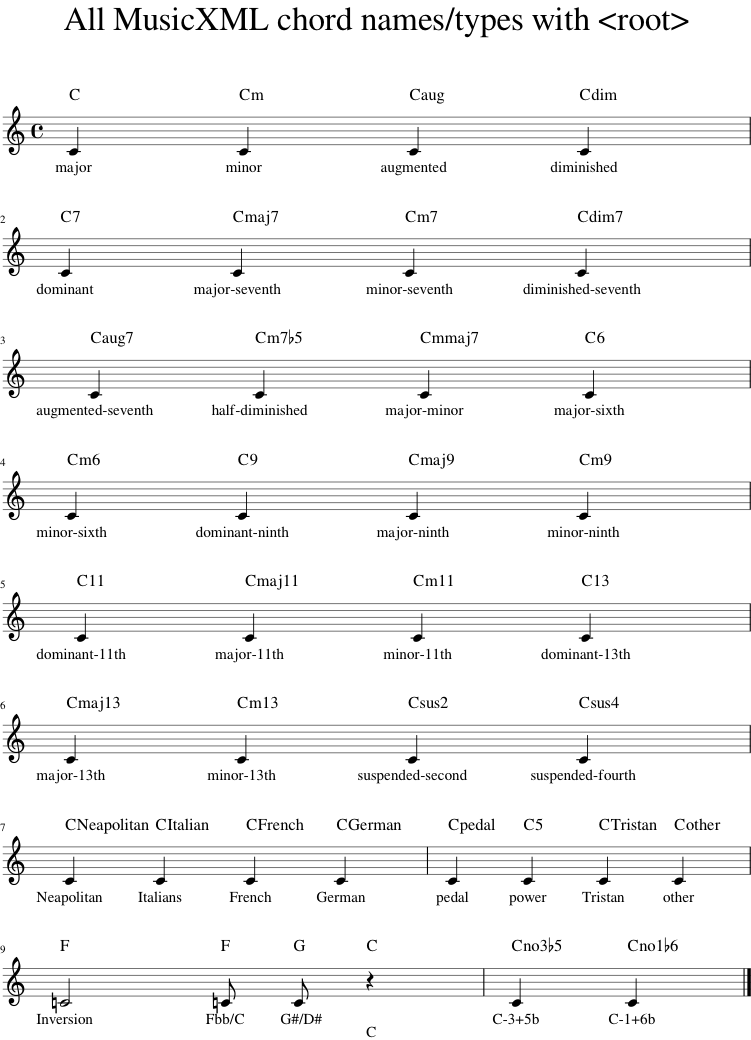

In [129]:
s('71f')

71g-MultipleChordnames.xml

There can be multiple subsequent harmony elements, indicating a harmony change during a note


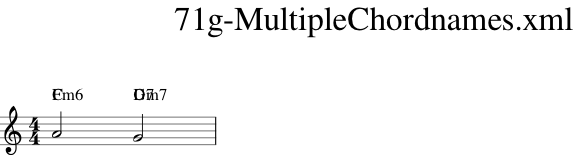

In [130]:
s('71g')

## 72 ... Transposing instruments

72a-TransposingInstruments.xml

Transposing instruments: Trumpet in Bb, Horn in Eb, Piano; All of them show the C major scale (the trumpet with 2 sharp, the horn with 3 sharp).


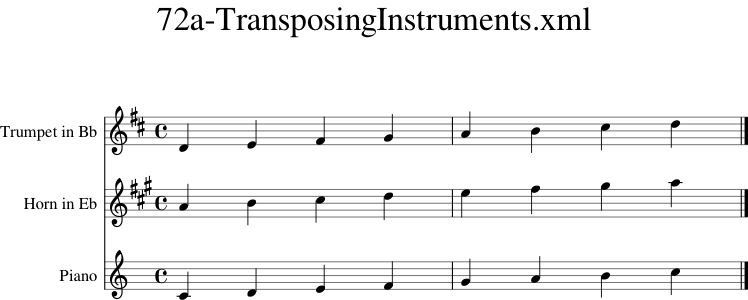

In [131]:
s('72a')

72b-TransposingInstruments-Full.xml

Various transposition. Each part plays a c'', just displayed in different display pitches. The second-to-last staff uses a transposition where the displayed c' is an actual f''' concert pitch. The final staff is an untransposed instrument.


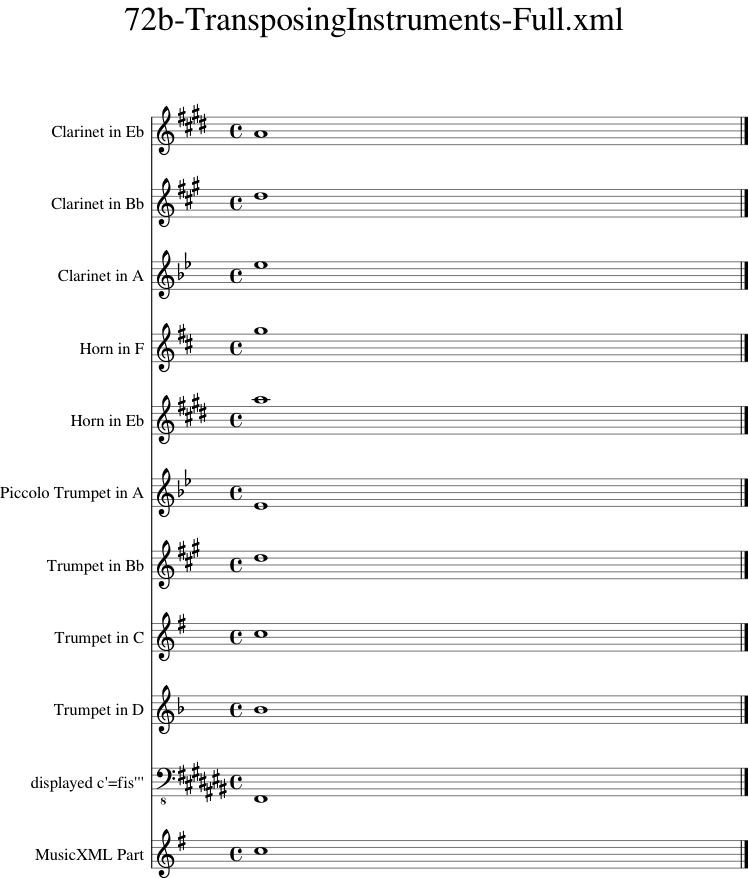

In [132]:
s('72b')

72c-TransposingInstruments-Change.xml

An instrument change from one transposition (Clarinet in Eb) to another transposing instrument (Clarinet in Bb). The displayed instrument name should also be updated. The whole piece is in Bb major (sounding), so first the key signature should be one flat, after the change it should have no accidentals. 


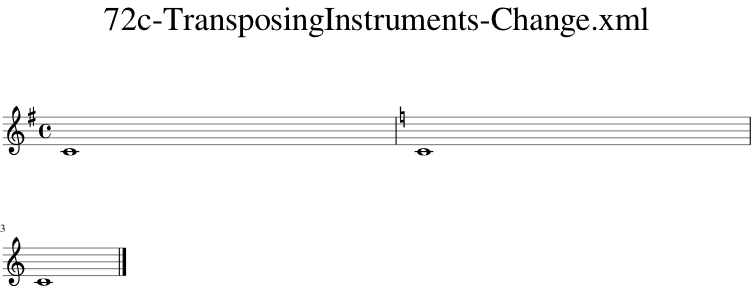

In [133]:
s('72c')

## 73 ... Percussion

73a-Percussion.xml

Three types of percussion staves: A five-line staff with bass clef for Timpani, a five-line staff with percussion clef, and a one-line percussion staff with only unpitched notes.


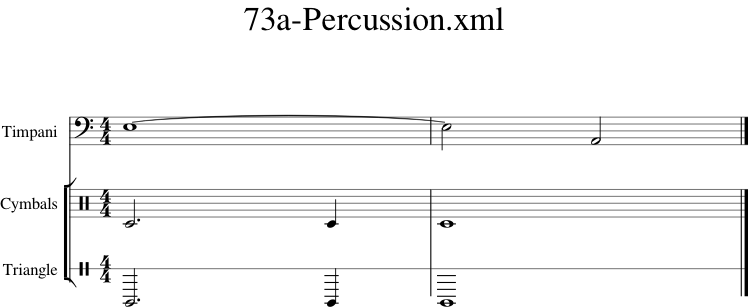

In [134]:
s('73a')

## 74 ... Figured bass

74a-FiguredBass.xml

Some figured bass containing alterated figures, bracketed figures and slashed figures. The last note contains an empty <figured-bass> element, which is invalid MusicXML, to check how well applications cope with malformed files. Note that this file does not contain any extenders!


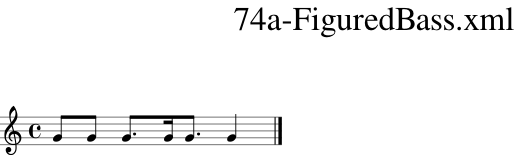

In [135]:
s('74a')

## 75 ... Other instrumental notation

75a-AccordionRegistrations.xml

All possible accordion registrations.


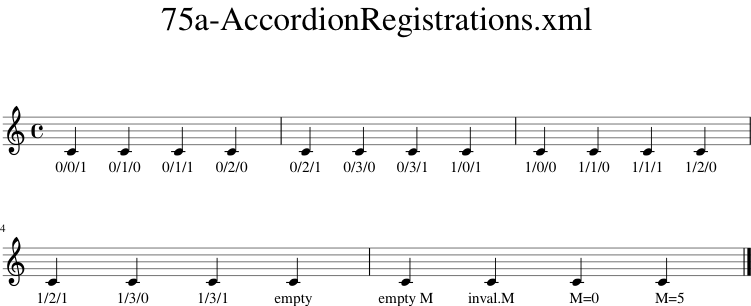

In [136]:
s('75a')

## 90 ... Compressed MusicXML files

90a-Compressed-MusicXML.mxl

A compressed MusicXML file, containing a simple MusicXML score and the corresponding .pdf output for reference.


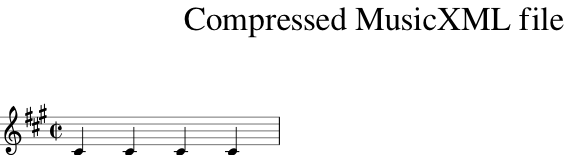

In [137]:
s('90a')

## 99 ... Compatibility with broken MusicXML

99a-Sibelius5-IgnoreBeaming.xml

Dolet 3 for Sibelius (5.1) did not print out any closing beam tags, only starting and continuing beam tags. For such files, one either needs to ignore all beaming information or close all beams 


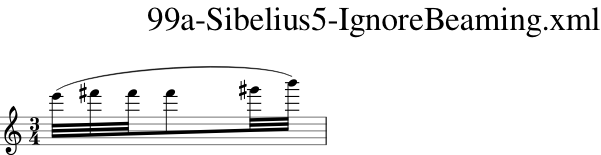

In [138]:
s('99a')

99b-Lyrics-BeamsMelismata-IgnoreBeams.xml

If we properly ignore all beaming information from the Dolet 3 for Sibelius export file, make sure that the lyrics syllables are still assigned to the correct notes.


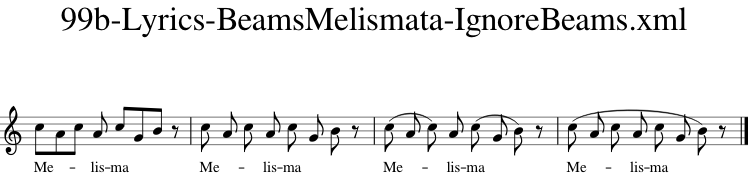

In [139]:
s('99b')

In [140]:
untested

[]